<a href="https://colab.research.google.com/github/stefanschlomoforster/approval-multiwinner/blob/master/KathiStefan_NLP_Project_milestone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
pip install pandas --upgrade

In [5]:
pip install tuw-nlp

     |████████████████████████████████| 43 kB 962 kB/s 
     |████████████████████████████████| 43 kB 1.0 MB/s 
     |████████████████████████████████| 227 kB 10.8 MB/s 


In [6]:
pip install xpotato

     |████████████████████████████████| 3.2 MB 8.9 MB/s 
     |████████████████████████████████| 320 kB 70.2 MB/s 
     |████████████████████████████████| 9.2 MB 4.2 MB/s 
     |████████████████████████████████| 106 kB 63.7 MB/s 
     |████████████████████████████████| 164 kB 24.8 MB/s 
     |████████████████████████████████| 76 kB 4.3 MB/s 
     |████████████████████████████████| 111 kB 69.5 MB/s 
     |████████████████████████████████| 4.3 MB 46.7 MB/s 
     |████████████████████████████████| 180 kB 61.3 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 127 kB 48.0 MB/s 
     |████████████████████████████████| 792 kB 59.0 MB/s 
     |████████████████████████████████| 374 kB 59.0 MB/s 
     |████████████████████████████████| 14.2 MB 61.3 MB/s 
     |████████████████████████████████| 3.4 MB 45.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |███

# Learning rules with POTATO

## Preprocessing of the data

In [1]:
import os

if not os.path.isdir("./data"):
    os.mkdir("./data")

import urllib.request

u = urllib.request.URLopener()
_ = u.retrieve(
    "https://raw.githubusercontent.com/CrowdTruth/Medical-Relation-Extraction/master/ground_truth_cause.csv",
    "data/ground_truth_cause.csv",
)
_ = u.retrieve(
    "https://raw.githubusercontent.com/CrowdTruth/Medical-Relation-Extraction/master/ground_truth_treat.csv",
    "data/ground_truth_treat.csv",
)

In [2]:
import pandas as pd
import numpy as np
import re

def get_term(sentence, start, end):
    """ helper function, which returns the entire term that should be replaced """
    match = re.search("[^\w]", sentence[end:])
    true_end = end + match.start() if match else end
    return(sentence[start: true_end])

def replace_terms(df):
  for i in range(0,len(cause)): #change the terms term1 and term2 in each sentence to "term1" and "term2"
    row = df.iloc[i]
    sentence = row["sentence"]
    term1 = get_term(sentence, row.b1, row.e1)
    term2 = get_term(sentence, row.b2, row.e2)
    sentence = sentence.replace(term1,'term1').replace(term2,'term2 ')
    df.at[i, 'sentence'] = sentence


def extract_labels(df):
    expert= df.expert

    crowd = df.crowd
    label = 0 #default label if no other label

    if expert == 1:
        label = 1 
    elif pd.isnull(expert) and crowd > 0:
        label = 1  
    
    return label

In [3]:
#load cause data
cause = pd.read_csv("data/ground_truth_cause.csv")
replace_terms(cause)

cause["label"] = cause.apply(extract_labels, axis=1) 
cause[["SID", "sentence", "label"]].head()

,SID,sentence,label
0,100003,"The limited data suggest that, in children wit...",0
1,100039,term1 are associated with difficult behaviors ...,0
2,100079,The term term1 is employed to indicate ataxia ...,1
3,100086,Non hereditary causes of cerebellar degenerati...,1
4,100145,The disorder can present with a migratory ture...,0


In [4]:
#load treat data
treat = pd.read_csv("data/ground_truth_treat.csv")
replace_terms(treat)

treat["label"] = treat.apply(extract_labels, axis=1)
treat[["SID", "sentence", "label"]].head()

,SID,sentence,label
0,100003,"The limited data suggest that, in children wit...",0
1,100039,term1 are associated with difficult behaviors ...,0
2,100079,The term term1 is employed to indicate ataxia ...,0
3,100086,Non hereditary causes of cerebellar degenerati...,0
4,100145,The disorder can present with a migratory ture...,0


In [7]:
import stanza
stanza.download("en")

2022-01-18 22:32:20 INFO: Downloading default packages for language: en (English)...
2022-01-18 22:33:46 INFO: Finished downloading models and saved to /root/stanza_resources.


In [8]:
import tuw_nlp
tuw_nlp.download_alto()
from xpotato.dataset.dataset import Dataset
from xpotato.models.trainer import GraphTrainer

In [9]:
def df_to_tuple_list(df):
  return list(df[["sentence", "label"]].to_records(index=False))

In [10]:
import torch

SEED = 1234
TEST_SIZE=0.3

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

from sklearn.model_selection import train_test_split as split
tr_cause, val_cause = split(cause, test_size=TEST_SIZE, random_state=SEED)
tr_treat, val_treat = split(treat, test_size=TEST_SIZE, random_state=SEED)

In [43]:
print(df_to_tuple_list(tr_cause))

[('Commonly used but unproven approaches involve avoiding topical irritants and using systemic drugs (eg, tricyclic antidepressants, anticonvulsants) or topical drugs (eg, 2% cromoglycate or 2 or 5% term2  in glaxal base) to interrupt term1.', 0), ('Low grade squamous intraepithelial term1 (cellular changes consistent with HPV, mild dysplasia, CIN 1) High grade squamous intraepithelial lesion (HSIL) (moderate to severe term2  CIN 2, CIN 3, CIS) (indicate if there are features suspicious of invasion) Squamous cell carcinoma Glandular cell Atypical glandular cells (specify endocervical, endometrial, or not otherwise specified) Atypical glandular cells, favor neoplastic (specify endocervi calor or not otherwise specified) Endocervical adenocarcinoma in situ (AIS) Adenocarcinoma Other (list not comprehensive.', 1), ('daughter, DES    The daughter of a mother who received term1 (DES) during term2 ', 0), ('3,    25  Other term1  Other unusual syndromes associated with  term2   include conjun

In [50]:
cause_dataset = Dataset(df_to_tuple_list(tr_cause), label_vocab = {1: 1, 0: 0})

In [52]:
cause_parse = cause_dataset.parse_graphs(graph_format="ud")

2022-01-19 00:49:48 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| sentiment | sstplus   |
| ner       | ontonotes |

INFO:stanza:Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| sentiment | sstplus   |
| ner       | ontonotes |

2022-01-19 00:49:48 INFO: Use device: cpu
INFO:stanza:Use device: cpu
2022-01-19 00:49:48 INFO: Loading: tokenize
INFO:stanza:Loading: tokenize
2022-01-19 00:49:48 INFO: Loading: pos
INFO:stanza:Loading: pos
2022-01-19 00:49:50 INFO: Loading: lemma
INFO:stanza:Loading: lemma
2022-01-19 00:49:50 INFO: Loading: depparse
INFO:stanza:Loading: depparse
2022-01-19 00:49:51 INFO: Loading: sentiment
INFO:stanza:Loading: sentiment
2022-01-19 00:49:53 

In [53]:
cause_dataset.set_graphs(cause_parse)


In [54]:
cause_df = cause_dataset.to_dataframe()

In [60]:
print(cause_df.label)

0       0
1       1
2       0
3       0
4       0
       ..
2783    0
2784    0
2785    0
2786    1
2787    1
Name: label, Length: 2788, dtype: int64


In [14]:
from xpotato.models.utils import to_dot
from graphviz import Source

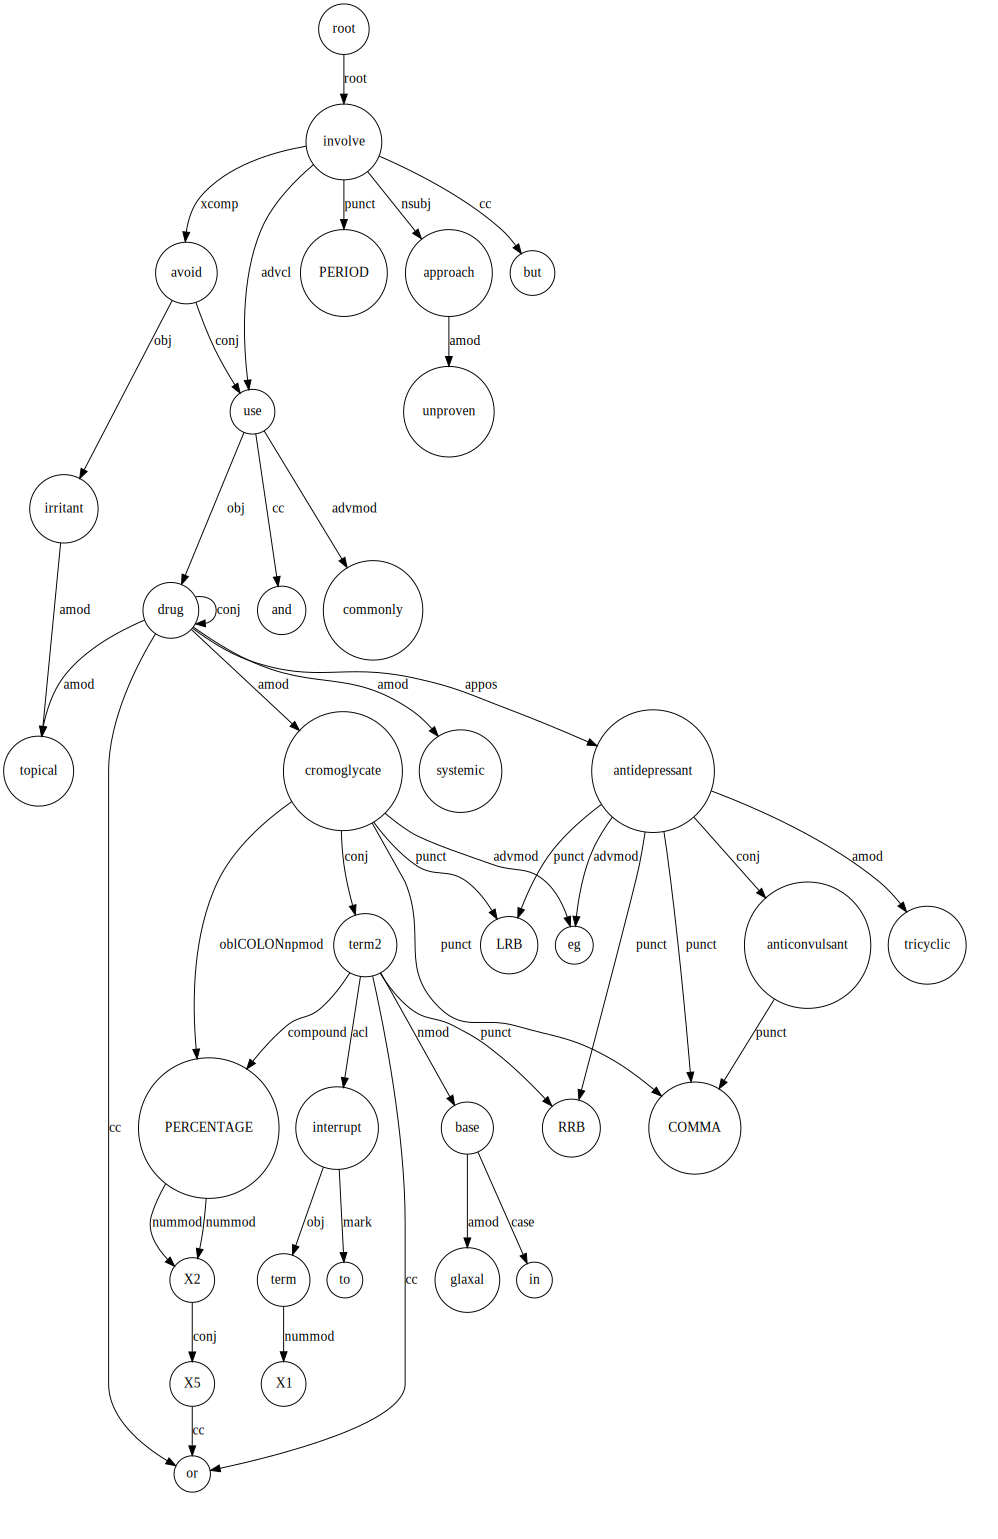

In [61]:
Source(to_dot(cause_dataset.graphs[0]))

## Learning rules

In [62]:
from xpotato.models.trainer import GraphTrainer

In [68]:
cause_trainer = GraphTrainer(cause_df)

Initializing trainer object...


In [72]:
ne = pd.compat._optional.import_optional_dependency("numexpr", errors="warn")

TypeError: ignored

In [69]:
features_cause = cause_trainer.prepare_and_train()

Featurizing graphs by generating subgraphs up to 2...


2788it [01:04, 43.00it/s]


Getting feature graphs...
Selecting the best features...


TypeError: ignored

#TREAT (TBD)

In [ ]:
treat_dataset = Dataset(df_to_tuple_list(tr_treat), label_vocab = {"1": 1, "0": 0})
treat_parse = treat_dataset.parse_graphs(graph_format="ud")
treat_dataset.set_graphs(treat_parse)

2022-01-04 09:45:33 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| sentiment | sstplus   |
| ner       | ontonotes |

INFO:stanza:Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| sentiment | sstplus   |
| ner       | ontonotes |

2022-01-04 09:45:33 INFO: Use device: cpu
INFO:stanza:Use device: cpu
2022-01-04 09:45:33 INFO: Loading: tokenize
INFO:stanza:Loading: tokenize
2022-01-04 09:45:33 INFO: Loading: pos
INFO:stanza:Loading: pos
2022-01-04 09:45:36 INFO: Loading: lemma
INFO:stanza:Loading: lemma
2022-01-04 09:45:36 INFO: Loading: depparse
INFO:stanza:Loading: depparse
2022-01-04 09:45:38 INFO: Loading: sentiment
INFO:stanza:Loading: sentiment
2022-01-04 09:45:40 

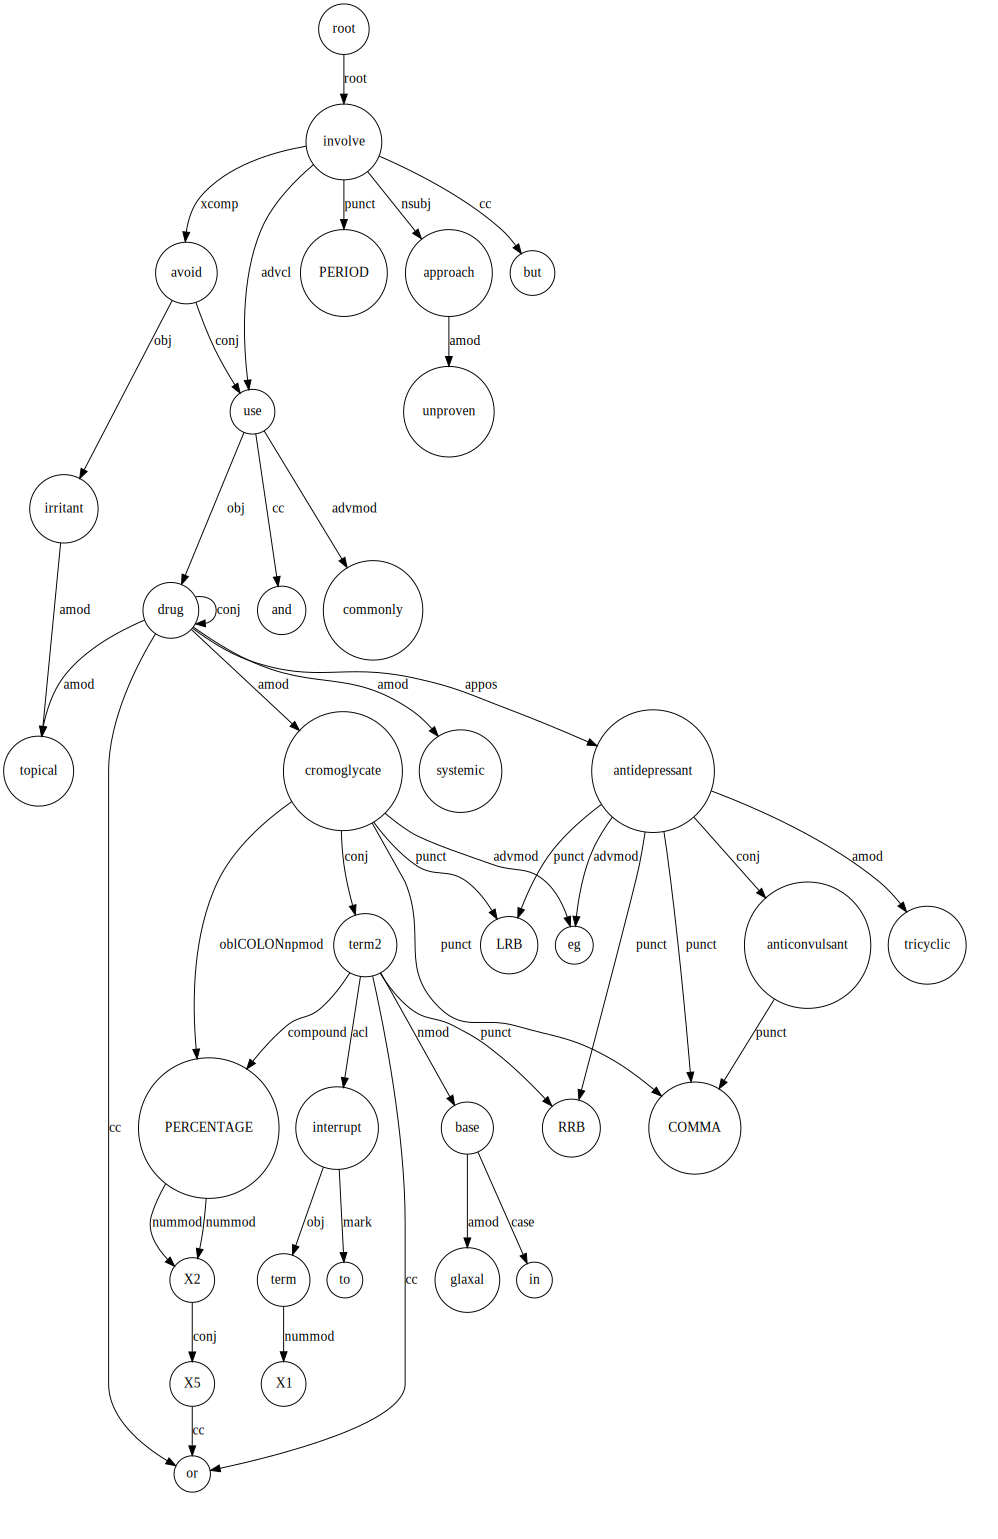

In [ ]:
Source(to_dot(treat_dataset.graphs[0]))